# Linear Regression

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
data=pd.read_excel("dataset/Linear Regression.xlsx")
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [7]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [9]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1D1108>,
      dtype=object)

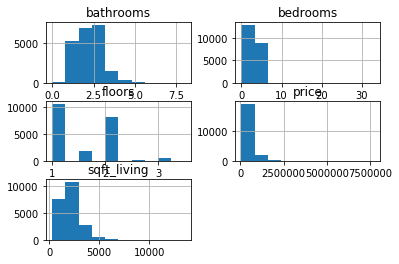

In [10]:
data.hist()

In [11]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


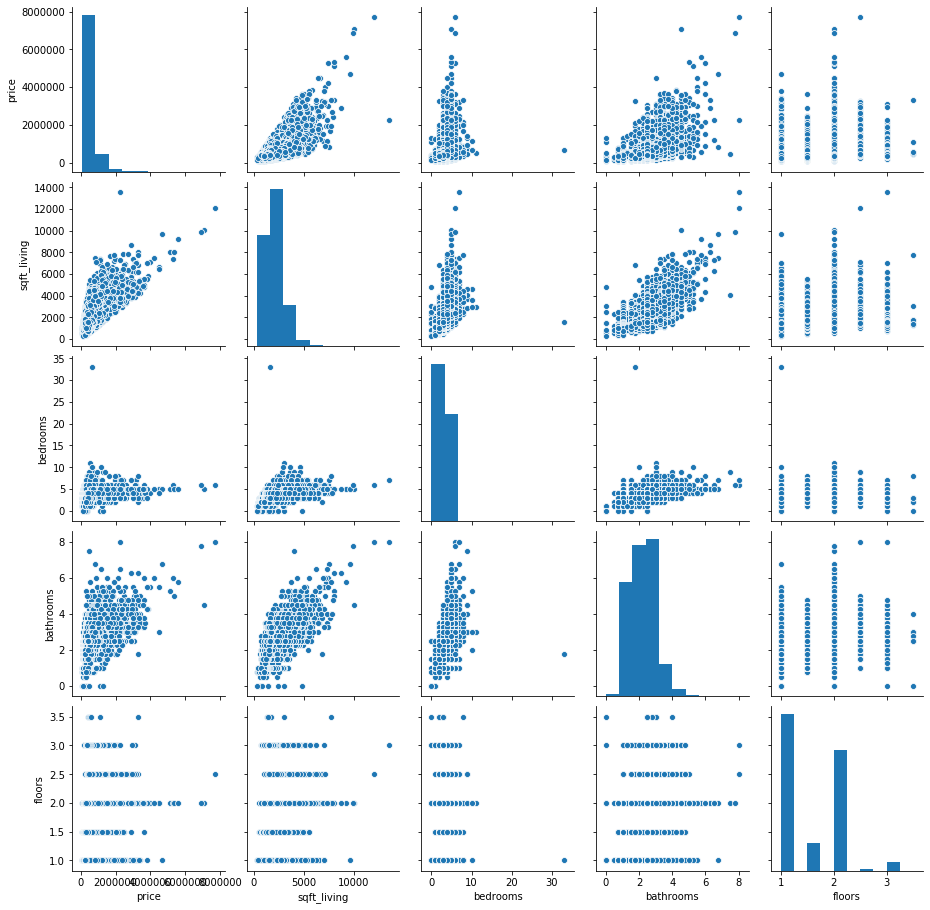

In [12]:
sns.pairplot(data)

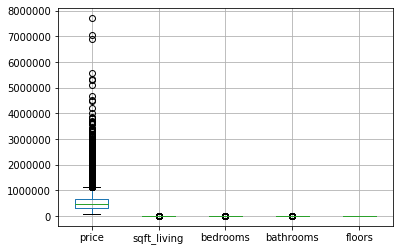

In [13]:
data.boxplot()

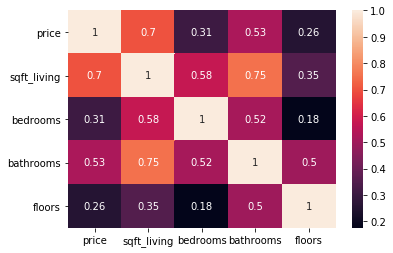

In [14]:
sns.heatmap(data.corr(), annot = True)

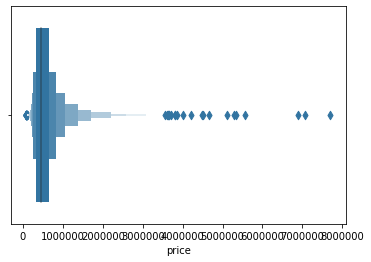

In [15]:
sns.boxenplot(data.price)

Linear regression between price and bedroom

In [16]:
x=data.iloc[:,:1]
x.head(1)

,price
0,221900


In [20]:
y=data.iloc[:,2:3]
y.head(1)

,bedrooms
0,3


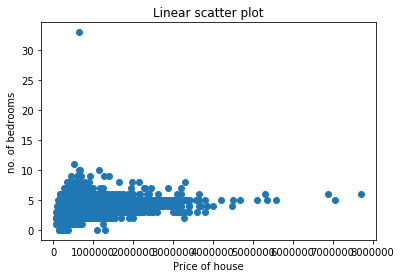

In [22]:
# visualize data
plt.scatter(x,y)
plt.title("Linear scatter plot")
plt.xlabel("Price of house")
plt.ylabel("no. of bedrooms")
plt.show()

In [23]:
# split the record for training & testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [30]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lin_reg.coef_

array([[8.09331985e-07]])

In [32]:
lin_reg.intercept_

array([2.93113061])

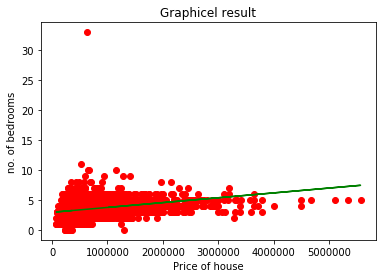

In [34]:
# visualize trining set result
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,lin_reg.predict(x_train),color="green")
plt.title("Graphicel result")
plt.xlabel("Price of house")
plt.ylabel("no. of bedrooms")
plt.show()

In [35]:
ypred=lin_reg.predict(x_test)
ypred

array([[3.30261399],
       [3.29128335],
       [3.78659452],
       ...,
       [3.14155693],
       [4.38388152],
       [3.26943138]])

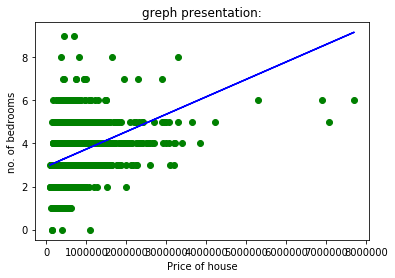

In [36]:
plt.scatter(x_test,y_test,color="green")
plt.plot(x_test,lin_reg.predict(x_test),color="blue")
plt.title("greph presentation:")
plt.xlabel("Price of house")
plt.ylabel("no. of bedrooms")
plt.show()

In [37]:
# Estimate the cost
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)
print("the R squared value is:",r_square)
print("The RMSE value is:",RMSE)

the R squared value is: 0.09819269754271542
The RMSE value is: 0.8676638497818341


In [38]:
unseen_pred=lin_reg.predict(np.array([[108]]))
print("the unseen for the given x is:",unseen_pred)

the unseen for the given x is: [[2.93121802]]


Linear regression between price and sqft_living

In [39]:

price = data.iloc[:, :1]
sqft_living = data.iloc[:,1:2]

Text(0, 0.5, 'Area in squarefeet')

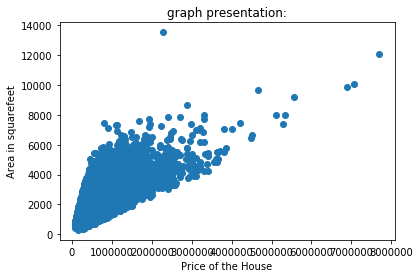

In [40]:
plt.scatter(price, sqft_living)
plt.title('graph presentation:')
plt.xlabel('Price of the House')
plt.ylabel('Area in squarefeet')

In [45]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(price, sqft_living, test_size = 0.3, random_state = 2)

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [47]:
lin_reg.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lin_reg.coef_

array([[0.00175561]])

In [49]:
lin_reg.intercept_

array([1126.33275865])

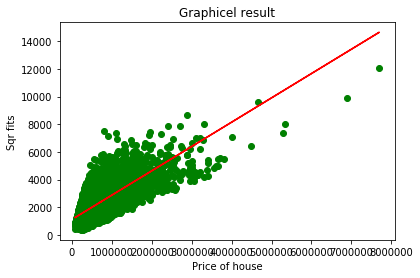

In [54]:
# visualize trining set result
plt.scatter(x_train1,y_train1,color="green")
plt.plot(x_train1,lin_reg.predict(x_train1),color="red")
plt.title("Graphicel result")
plt.xlabel("Price of house")
plt.ylabel("Sqr fits")
plt.show()

In [52]:
ypred=lin_reg.predict(x_test1)

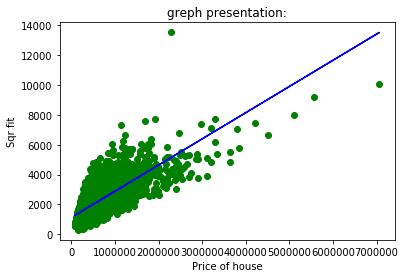

In [53]:
plt.scatter(x_test1,y_test1,color="green")
plt.plot(x_test1,lin_reg.predict(x_test1),color="blue")
plt.title("greph presentation:")
plt.xlabel("Price of house")
plt.ylabel("Sqr fit")
plt.show()

In [55]:
# Estimate the cost
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test1,ypred))
r_square=r2_score(y_test1,ypred)
print("the R squared value is:",r_square)
print("The RMSE value is:",RMSE)

the R squared value is: 0.4952101890160381
The RMSE value is: 662.299619161394


In [56]:
unseen_pred=lin_reg.predict(np.array([[329]]))
print("the unseen for the given x is:",unseen_pred)

the unseen for the given x is: [[1126.91035274]]


Linear regression between price and bathrooms

In [3]:
x=data.iloc[:,:1]
y=data.iloc[:,3:4]
y.head(1)

,bathrooms
0,1.0


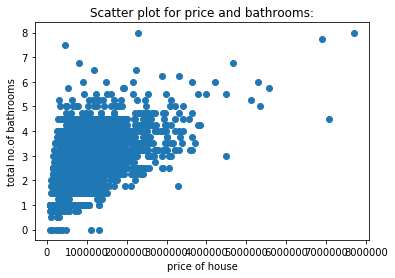

In [4]:
plt.scatter(x,y)
plt.title("Scatter plot for price and bathrooms:")
plt.xlabel("price of house")
plt.ylabel("total no.of bathrooms")
plt.show()

In [7]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
lin_reg=LinearRegression()
lin_reg.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lin_reg.coef_

array([[1.10105199e-06]])

In [11]:
lin_reg.intercept_

array([1.5185242])

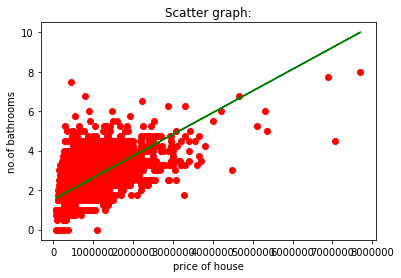

In [13]:
plt.scatter(x_train1,y_train1,color="red")
plt.plot(x_train1,lin_reg.predict(x_train1),color="green")
plt.title("Scatter graph:")
plt.xlabel("price of house")
plt.ylabel("no.of bathrooms")
plt.show()

In [17]:
ypred=lin_reg.predict(x_test1)

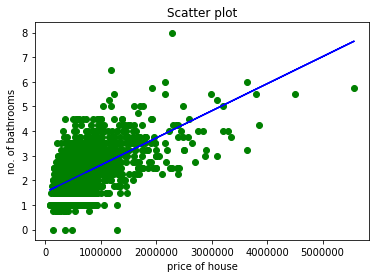

In [18]:
plt.scatter(x_test1,y_test1,color="green")
plt.plot(x_test1,lin_reg.predict(x_test1),color="blue")
plt.title("Scatter plot")
plt.xlabel("price of house")
plt.ylabel("no. of bathrooms")
plt.show()

In [21]:
RMSE=np.sqrt(mean_squared_error(y_test1,ypred))
r_square=r2_score(y_test1,ypred)
print("The R_square value is:", r_square)
print("The RMSE value is:",RMSE)

The R_square value is: 0.28127401846250877
The RMSE value is: 0.6591011174526225


In [22]:
unseen_pred=lin_reg.predict(np.array([[220]]))
print("the unseen for the given x is :",unseen_pred)

the unseen for the given x is : [[1.51876644]]


Linear regression between price and sqft_living 

In [25]:
x=data.iloc[:,:1]
y=data.iloc[:,1:2]
y.head(1)

,sqft_living
0,1180


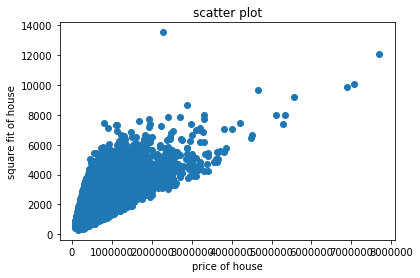

In [26]:
plt.scatter(x,y)
plt.title("scatter plot")
plt.xlabel("price of house")
plt.ylabel("square fit of house")
plt.show()

In [27]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
lin_reg=LinearRegression()

In [29]:
lin_reg.fit(x_train2,y_train2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_reg.coef_

array([[0.00174633]])

In [32]:
lin_reg.intercept_

array([1131.43277126])

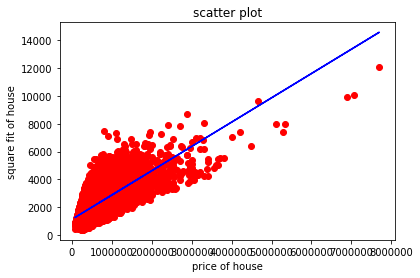

In [34]:
plt.scatter(x_train2,y_train2,color="red")
plt.plot(x_train2,lin_reg.predict(x_train2),color="blue")
plt.title("scatter plot")
plt.xlabel("price of house")
plt.ylabel("square fit of house")
plt.show()

In [35]:
ypred=lin_reg.predict(x_test2)

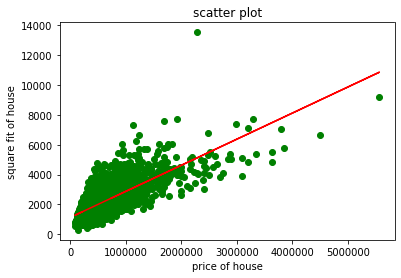

In [37]:
plt.scatter(x_test2,y_test2,color="green")
plt.plot(x_test2,lin_reg.predict(x_test2),color="red")
plt.title("scatter plot")
plt.xlabel("price of house")
plt.ylabel("square fit of house")
plt.show()

In [38]:
RMSE=np.sqrt(mean_squared_error(y_test2,ypred))
r_square=r2_score(y_test2,ypred)
print("R square value:",r_square)
print("RMSE value is:",RMSE)

R square value: 0.5022021804710803
RMSE value is: 666.5368304302992


In [39]:
unseen_pred=lin_reg.predict(np.array([[105]]))
print("the unseen for given x is:",unseen_pred)

the unseen for given x is: [[1131.61613601]]


Linear Regression between price and floors

In [40]:
x=data.iloc[:,:1]

In [46]:
y=data.iloc[:,4:5]
y.head(1)

,floors
0,1.0


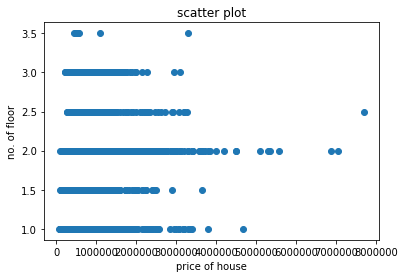

In [47]:
plt.scatter(x,y)
plt.title("scatter plot")
plt.xlabel("price of house")
plt.ylabel("no. of floor")
plt.show()

In [48]:
x_train3,x_test3,y_train3,y_test3=train_test_split(x,y,test_size=0.2,random_state=3)

In [49]:
lin_reg=LinearRegression()

In [50]:
lin_reg.fit(x_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lin_reg.coef_

array([[3.72401481e-07]])

In [52]:
lin_reg.intercept_

array([1.29649595])

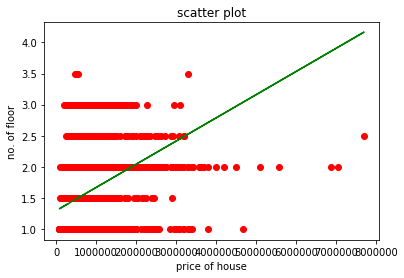

In [53]:
plt.scatter(x_train3,y_train3,color="red")
plt.plot(x_train3,lin_reg.predict(x_train3),color="green")
plt.title("scatter plot")
plt.xlabel("price of house")
plt.ylabel("no. of floor")
plt.show()

In [54]:
ypred=lin_reg.predict(x_test3)

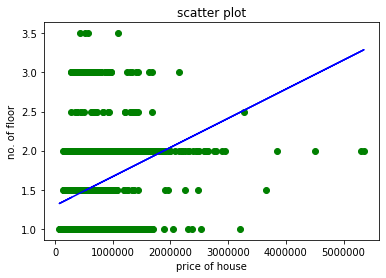

In [55]:
plt.scatter(x_test3,y_test3,color="green")
plt.plot(x_test3,lin_reg.predict(x_test3),color="blue")
plt.title("scatter plot")
plt.xlabel("price of house")
plt.ylabel("no. of floor")
plt.show()

In [56]:
RMSE=np.sqrt(mean_squared_error(y_test3,ypred))
r_square=r2_score(y_test3,ypred)
print("The R_square value is:",r_square)
print("The RMSE value is:",RMSE)

The R_square value is: 0.06872240637418736
The RMSE value is: 0.5229899475888462


In [57]:
unseen_pred=lin_reg.predict(np.array([[108]]))
print("The unseen for given x is:",unseen_pred)

The unseen for given x is: [[1.29653617]]
